In [48]:
# pip install --upgrade seaborn

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv("cardio_train.csv",sep=';')

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.shape

(70000, 13)

In [6]:
na_values = df.isna().sum()    # Check if there is any NA values
na_values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


There are 70000 columns of data, contain with 13 features included,id,age,gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio.

Understand Columns:

1. Id: ID numbers, each person will have unique id numbers in this dataset
2. Age: a person age in days
3. Gender: 1-women, 2-men
4. Height: a person height in Centimeter(cm)
5. Weight: a person weight in Kilogramskg)
6. Ap-hi:  Systolic (High) blood pressure
7. Ap-lo:  Diastolic (Low) blood pressure
8. Cholesterol: 1: normal, 2: above normal, 3: well above normal
9. Gluc:   1: normal, 2: above normal, 3: well above normal
10. Smoke: 1 Yes, 0 No
11. Alco:  Alcohol intake  1 Yes, 0 No
12. Active:Physical activity 
13. Cardio: 1 Yes Carido, 0 No Carido


# EDA Process

### Let first convert age in year to better understand the CVD(Cardiovascular Disease) distributions in Age

In [9]:
df['age'] = df['age'].div(365).round(0).astype(int)

In [10]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
min(df["age"])  # The minimal age in this dataset is 30 years old

30

In [12]:
max(df["age"])  # The maxinum age in this dataset is 30 years old

65

## Visualization

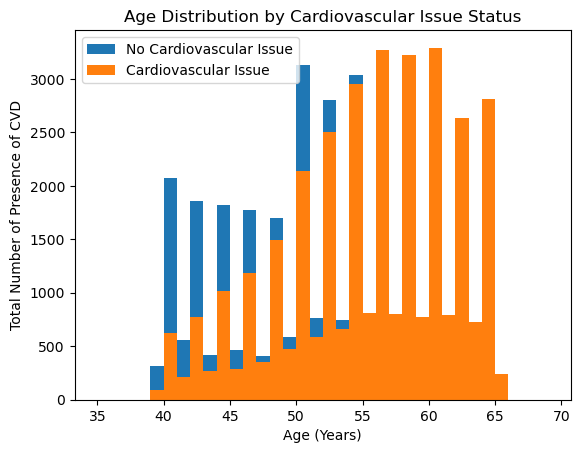

In [13]:
# Plotting the histogram for age distribution for each cardio category

# Histogram for individuals without cardiovascular issues
plt.hist(df[df['cardio'] == 0]['age'], bins=np.arange(35, 70), alpha=1, label='No Cardiovascular Issue')

# Histogram for individuals with cardiovascular issues
plt.hist(df[df['cardio'] == 1]['age'], bins=np.arange(35, 70), alpha=1, label='Cardiovascular Issue')

# Setting the title and labels
plt.title('Age Distribution by Cardiovascular Issue Status')
plt.xlabel('Age (Years)')
plt.ylabel('Total Number of Presence of CVD')
plt.legend()
plt.show()

The histogram shows the relationship between age and the presence of cardiovascular disease (CVD) in the dataset, indicating that CVD becomes more prevalent with age get older. The 35-40 age group has a low number with CVD. As age increases, the 55-60 age group has the highest total number of people with CVD. The number of people with CVD is higher in the older age groups than in the older age groups.The number of people with CVD is higher in the older age groups than in the older age groups. This trend suggests that there is a clear correlation between increasing age and the occurrence of cardiovascular problems, with the oldest age group having the highest incidence of cardiovascular disease. The distribution is not homogeneous, reflecting the fact that the incidence of cardiovascular disease varies by age, but is clearly skewed towards the older age groups.

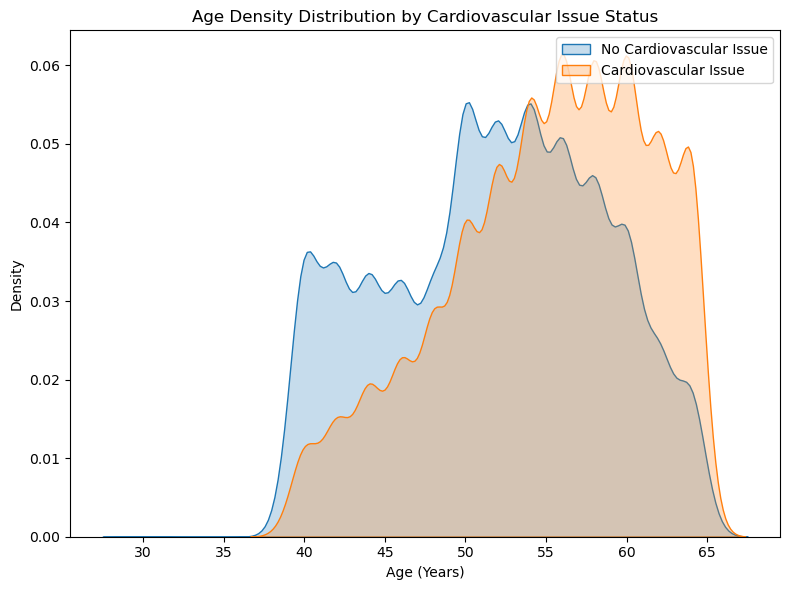

In [14]:
# Density plots for the distribution of age for each cardiovascular issue status
plt.figure(figsize=(8, 6))
        
# Density Plot for individuals without cardiovascular issues
sns.kdeplot(df[df['cardio'] == 0]['age'], fill=True, label='No Cardiovascular Issue')

# Density Plot for individuals with cardiovascular issues
sns.kdeplot(df[df['cardio'] == 1]['age'], fill=True, label='Cardiovascular Issue')
        
# Setting the title and labels
plt.title('Age Density Distribution by Cardiovascular Issue Status')
plt.xlabel('Age (Years)')
plt.ylabel('Density')
plt.legend()
        
# Show plot
plt.tight_layout()
plt.show()

The density plot contrasts age distributions for individuals with and without cardiovascular disease (CVD). Younger ages have a higher prevalence of CVD-free individuals, while older ages show a higher prevalence of those with CVD. The plot reveals a crossover point in the mid-40s where the likelihood of CVD increases with age, indicating a clear age-related trend in CVD occurrence.

## Let See BMI ( Body Mass Index) and CVD relation.

\begin{align}
BMI = \frac{\text{weight in kilograms}}{(\text{height in meters})^2}
\end{align}

#### Calculate the BMI

In [15]:
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)

In [16]:
df.head(3)  # Show the first three row with new add column BMI

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805


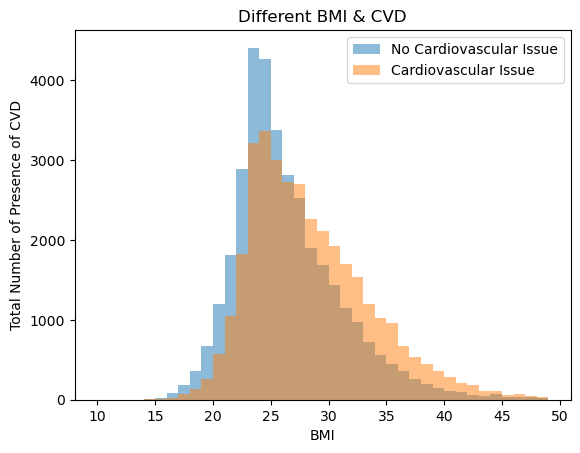

In [17]:
# Plotting the histogram for age distribution for each cardio category

# Histogram for individuals without cardiovascular issues
plt.hist(df[df['cardio'] == 0]['BMI'], bins=np.arange(10, 50), alpha=0.5, label='No Cardiovascular Issue')

# Histogram for individuals with cardiovascular issues
plt.hist(df[df['cardio'] == 1]['BMI'], bins=np.arange(10, 50), alpha=0.5, label='Cardiovascular Issue')

# Setting the title and labels
plt.title('Different BMI & CVD')
plt.xlabel('BMI')
plt.ylabel('Total Number of Presence of CVD')
plt.legend()
plt.show()

This histogram visualizes the age distribution of the population in relation to cardiovascular problems. One striking pattern is that the age distribution of people with cardiovascular problems tends to favor older groups, peaking in the mid-20s and then tapering off. This pattern showed a significant overlap in the age ranges of the two groups, suggesting that cardiovascular problems are also present in younger age groups, albeit at a lower frequency. The data therefore emphasize the importance of considering age factors in the prevalence and management of cardiovascular health.

### Gender And Smoking 

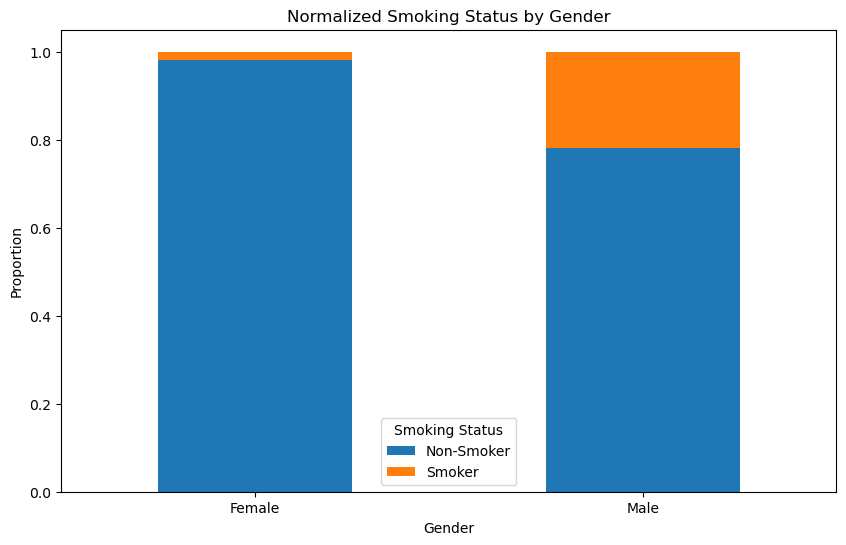

In [18]:
# Normalize the cross-tabulation
cross_tab_normalized = pd.crosstab(df['gender'], df['smoke'], normalize='index')

# Plotting the normalized stacked bar chart
cross_tab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding titles and labels
plt.title('Normalized Smoking Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.legend(title='Smoking Status', labels=['Non-Smoker', 'Smoker'])

# Show the plot
plt.show()

The normalized stacked bar chart shows a clear difference in smoking habits between the sexes. It shows that most women and men are non-smokers, but a significantly higher proportion of men smoke. Although non-smokers are in the majority in both genders, orange smokers are significantly more prevalent among males than females. This suggests that smoking is more prevalent among men, highlighting a key area for targeted cessation interventions. This visualization is a clear reminder of the persistent gender differences in tobacco use and the need for gender-specific health policies and programs.

# Models

Generalized Linear Models: 

Four different versions of regression in the Bayesian setting:
- Linear regression, for predicting real-valued outputs(see 1 below)
- Logistic regression, for predicting binary outputs (classification)(see 3 below)
- Poisson regression, for predicting counts
- Negative binomial regression, for predicting counts(see 4 below)

Nonparametric Methods:
- Decision Tree(see 2 below)

# 1. Linear regression

In [19]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [20]:
X_cols = ["age", "gender", "BMI", "ap_hi", "gluc", "smoke"] # Columns used for prediction
y_col = "cardio"   # The column we're trying to predict

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train, test = train_test_split(df, test_size=0.3, random_state=101)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
linear_model = LinearRegression()
X = train.loc[:, X_cols]
y = train.loc[:, y_col]
linear_model.fit(X, y)
train["linear_pred"] = linear_model.predict(train.loc[:, X_cols])
test["linear_pred"] = linear_model.predict(test.loc[:, X_cols])

In [25]:
train["linear_pred"]

20462    0.576988
59648    0.395203
33399    0.344006
1454     0.376180
27406    0.611755
           ...   
20463    0.641318
55293    0.241409
49751    0.444154
5695     0.413632
45919    0.314424
Name: linear_pred, Length: 49000, dtype: float64

In [26]:
test["linear_pred"]

6733     0.665304
52709    0.398949
52970    0.723640
12445    0.537708
26310    0.694087
           ...   
47357    0.296604
49978    0.498904
25463    0.587370
39998    0.671420
37156    0.556228
Name: linear_pred, Length: 21000, dtype: float64

In [27]:
train_rmse = np.mean((train["linear_pred"] - train["cardio"]) ** 2) ** 0.5
test_rmse = np.mean((test["linear_pred"] - test["cardio"]) ** 2) ** 0.5

print("Training set error for linear model:", train_rmse)
print("Test set error for linear model: ", test_rmse)

Training set error for linear model: 0.47923742904724265
Test set error for linear model:  0.4773777509094464


In [28]:
print(X_cols)
linear_model.coef_

['age', 'gender', 'BMI', 'ap_hi', 'gluc', 'smoke']


array([ 0.01614222,  0.03676844,  0.01148309,  0.00012981,  0.0420685 ,
       -0.01702317])

In [29]:
test["abs_linear_error"] = np.abs(test["linear_pred"] - test["cardio"])
worst_linear_predicted_cars_df = test.sort_values("abs_linear_error", ascending=False).take([0, 1])
worst_linear_predicted_cars_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,linear_pred,abs_linear_error
47253,67502,54,1,160,65.0,14020,90,1,1,0,0,1,0,25.390625,2.267777,2.267777
27384,39156,42,1,80,178.0,140,90,3,3,0,0,1,1,278.125000,3.258629,2.258629


# 2. Decision Trees

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Assuming df is your DataFrame and 'cardio' is the target variable

# Selecting features and target
X = df[['age', 'gender', 'BMI', 'ap_hi', 'gluc', 'smoke']]  # adjust features as needed
y = df['cardio']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Initialize and train decision tree
tree_model = DecisionTreeClassifier(random_state=101)
tree_model.fit(X_train, y_train)

# Initialize and train random forest
forest_model = RandomForestClassifier(n_estimators=100, random_state=101)
forest_model.fit(X_train, y_train)

# Making predictions
tree_pred = tree_model.predict(X_test)
forest_pred = forest_model.predict(X_test)

# Evaluating the models
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, forest_pred))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1]))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, forest_model.predict_proba(X_test)[:, 1]))
print("Decision Tree Report:\n", classification_report(y_test, tree_pred))
print("Random Forest Report:\n", classification_report(y_test, forest_pred))


Decision Tree Accuracy: 0.6355238095238095
Random Forest Accuracy: 0.6598571428571428
Decision Tree ROC-AUC: 0.6405934735358962
Random Forest ROC-AUC: 0.7217490613516049
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65     10543
           1       0.64      0.60      0.62     10457

    accuracy                           0.64     21000
   macro avg       0.64      0.64      0.64     21000
weighted avg       0.64      0.64      0.64     21000

Random Forest Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66     10543
           1       0.66      0.66      0.66     10457

    accuracy                           0.66     21000
   macro avg       0.66      0.66      0.66     21000
weighted avg       0.66      0.66      0.66     21000



In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
tree_model = DecisionTreeRegressor()

In [33]:
X = train.loc[:, X_cols]
y = train.loc[:, y_col]
tree_model.fit(X, y)
train["tree_pred"] = tree_model.predict(train.loc[:, X_cols]) 
test["tree_pred"] = tree_model.predict(test.loc[:, X_cols]) 

In [34]:
train_rmse = np.mean((train["tree_pred"] - train["cardio"]) ** 2) ** 0.5
test_rmse = np.mean((test["tree_pred"] - test["cardio"]) ** 2) ** 0.5

print("Training set error for decision tree:", train_rmse)
print("Test set error for decision tree: ", test_rmse)

Training set error for decision tree: 0.1650027165022857
Test set error for decision tree:  0.5906996473150813


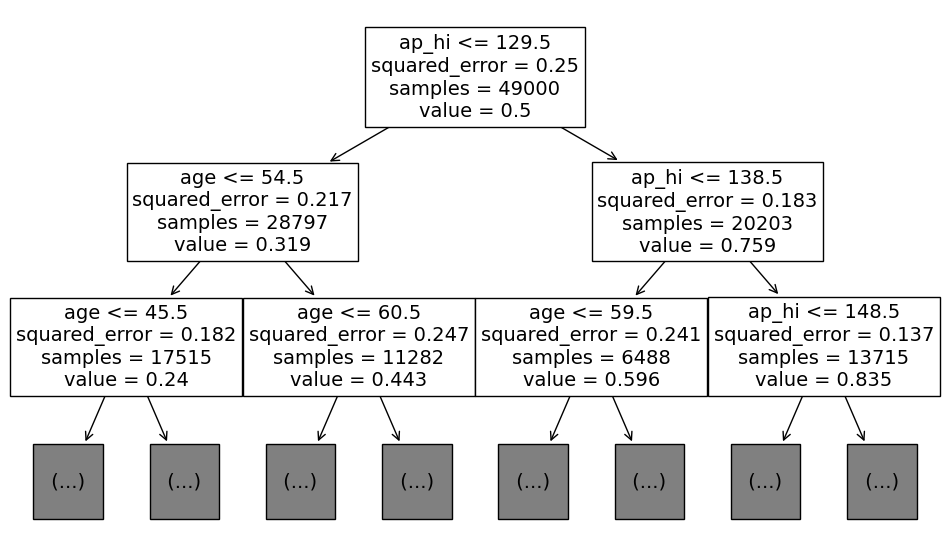

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 7))
plot_tree(tree_model, max_depth=2, fontsize=14, feature_names=X_cols);

# 3. Logistic regression

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import pandas as pd

# Selecting features and target

# age	gender	height	weight	ap_hi	ap_lo	cholesterol	gluc	smoke	alco	active	cardio
X = df[['age', 'gender', 'BMI', 'ap_hi', 'gluc', 'smoke',"height","active","cholesterol"]]  # Adjust features as needed
y = df['cardio']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


Accuracy: 0.7213809523809523
ROC-AUC: 0.7881659847519801
Confusion Matrix:
 [[8146 2397]
 [3454 7003]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.74     10543
           1       0.74      0.67      0.71     10457

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



In [37]:
train, test = train_test_split(df, test_size=0.3, random_state=101)

X_cols = ["age", "gender", "BMI", "ap_hi", "gluc", "smoke"] # Columns used for prediction
y_col = "cardio"   # The column we're trying to predict

from sklearn.linear_model import LogisticRegression

X_train = train[X_cols].values
y_train = train[y_col].values

X_test = test[X_cols].values
y_test = test[y_col].values

model_simple_features = LogisticRegression(penalty='none', solver='lbfgs')

model_simple_features.fit(X_test, y_test)

probs = model_simple_features.predict_proba(X_test)[:, 1]

y_hat = (probs > 0.5).astype(np.int64)

accuracy = np.mean(y_test == y_hat)

print(f"Accuracy on test set: {accuracy}")

/srv/conda/envs/notebook/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Accuracy on test set: 0.7126666666666667


## 4.Poisson Regression

In [38]:
# Adding a constant to the predictors
X = sm.add_constant(X)

# Fit a Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the summary of the model to see the output
print(poisson_model.summary())
# Prediction on the dataset (or you can split into training/testing)
y_pred = poisson_model.predict(X)

y_pred_binary = (y_pred >= 0.5).astype(int)

# Evaluate the predictions

print("Accuracy:", accuracy_score(y, y_pred_binary))
print("Classification Report:\n", classification_report(y, y_pred_binary))


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 cardio   No. Observations:                70000
Model:                            GLM   Df Residuals:                    69990
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57409.
Date:                Wed, 01 May 2024   Deviance:                       44861.
Time:                        16:01:14   Pearson chi2:                 3.44e+04
No. Iterations:                     7   Pseudo R-squ. (CS):            0.05111
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.2540      0.139    -30.579      

In [39]:
# Add random features

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def add_random_feature(train_data, test_data):
    # Returns the modified train_data and test_data
    coeffs = np.random.uniform(-1, 1, 6) 
    
    # This code gives the feature a convenient name
    feat_name = f"({coeffs[0]:0.2f}x1 + {coeffs[1]:0.2f}x2 + {coeffs[2]:0.2f}x3 + {coeffs[3]:0.2f}x4 + {coeffs[4]:0.2f}x5 + {coeffs[5]:0.2f}x6)"
    
    for dataset in (train_data, test_data):
        linear_combination = np.dot(dataset[X_cols], coeffs)
        feature = sigmoid(linear_combination) 
        dataset[feat_name] = feature
        
    return train_data, test_data

In [40]:
# # There seems to be a problem. We need to correct it.

# train_feats = train.copy()
# test_feats = test.copy()

# for i in range(30):
#     train_feats, test_feats = (add_random_feature(train_feats, test_feats))

# train_feats.head()

In [41]:
# # There seems to be a problem. We need to correct it.

# X_train = train_feats.iloc[:, 1:].values
# y_train = train_feats[y_col].values
# X_test = test_feats.iloc[:, 1:].values
# y_test = test_feats[y_col].values

# # Initialize and train the logistic regression model
# model_features = LogisticRegression(penalty='none', solver='lbfgs')
# model_features.fit(X_train, y_train)

# # Predict probabilities and convert to binary predictions
# probs = model_features.predict_proba(X_test)[:, 1]
# y_hat = (probs > 0.5).astype(np.int64)

# # Calculate accuracy
# accuracy = np.mean(y_test == y_hat)

# print(f"Accuracy on test set: {accuracy}")

# 5. Negative Binomial Regression

In [42]:
import statsmodels.api as sm

X = sm.add_constant(df[["age", "gender", "BMI", "ap_hi", "smoke"]])
y = df.cardio

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Negative Binomial regression model
negbin_model = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial())
negbin_results = negbin_model.fit()

# Make predictions on the test set
probs = negbin_results.predict(X_test)

# Convert predicted probabilities to binary predictions
y_hat = (probs > 0.5).astype(np.int64)

accuracy = np.mean(y_test == y_hat)

print(f"Accuracy on test set: {accuracy}")

# If there's way to improve the accurancy

/srv/conda/envs/notebook/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Accuracy on test set: 0.6284285714285714


# 6. AIC Model

In [43]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

df['gender'] = df['gender'].astype('category')
df['cholesterol'] = df['cholesterol'].astype('category')
df['gluc'] = df['gluc'].astype('category')

# Create dummy variables for categorical features

# id	age	gender	height	weight	ap_hi	ap_lo	cholesterol	gluc	smoke	alco	active	cardio	
df_encoded = pd.get_dummies(df, columns=['gender', 'cholesterol', 'gluc'], drop_first=True)


X = df_encoded.drop('cardio', axis=1) 
y = df_encoded['cardio']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add a constant to the training data
X_train_sm = sm.add_constant(X_train) 
# Convert X_train_sm and y_train to numpy arrays to avoid dtype issues in statsmodels
X_train_sm_np = np.array(X_train_sm, dtype=float)
y_train_np = np.array(y_train, dtype=float)

# Fit the logistic regression model using statsmodels
logit_model_np = sm.Logit(y_train_np, X_train_sm_np)
result_np = logit_model_np.fit()
aic_value_np = result_np.aic

print("AIC for the model:", aic_value_np)

Optimization terminated successfully.
         Current function value: 0.599559
         Iterations 7
AIC for the model: 58788.801202827635


In [44]:
model_summary = result_np.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                49000
Model:                          Logit   Df Residuals:                    48984
Method:                           MLE   Df Model:                           15
Date:                Wed, 01 May 2024   Pseudo R-squ.:                  0.1350
Time:                        16:01:18   Log-Likelihood:                -29378.
converged:                       True   LL-Null:                       -33964.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.8177      0.396    -17.226      0.000      -7.593      -6.042
x1           1.31e-08   3.44e-07      0.038      0.970   -6.61e-07    6.87e-07
x2             0.0543      0.002     35.389      0.000       0.051       0.057
x3            -0.0101      0.002     -4.316      0.000      -0.015      -0.006
x4             0.0186      0.002     10.186      0.000       0.015       0.022
x5             0.0349      0.001     49.939      0.000       0.033       0.036
x6             0.0003    7.1e-05      3.726      0.000       0.000       0.000
x7            -0.1232      0.039     -3.142      0.002      -0.200      -0.046
x8            -0.1990      0.047     -4.215      0.000      -0.292      -0.106
x9            -0.1885      0.025     -7.552      0.000      -0.237      -0.140
x10           -0.0082      0.004     -1.962      0.050      -0.016   -1.05e-05
x11            0.0295      0.025      1.172      0.241      -0.020       0.079
x12            0.4420      0.031     14.457      0.000       0.382       0.502
x13            1.1541      0.041     28.218      0.000       1.074       1.234
x14            0.0389      0.041      0.955      0.340      -0.041       0.119
x15           -0.3275      0.045     -7.200      0.000      -0.417      -0.238
==============================================================================
"""

#### Accuracy Score of AIC model

In [45]:
X_test_sm = sm.add_constant(X_test)  # Ensure a constant is added to match the training data format
X_test_sm = X_test_sm.astype(float)  # Convert X_test_sm to float64 to ensure compatibility
y_pred_prob = result_np.predict(X_test_sm)  # This is where you actually predict probabilities

# Convert predicted probabilities to binary predictions
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 0.7203333333333334


## ROC-AUC Score and ROC Curve 

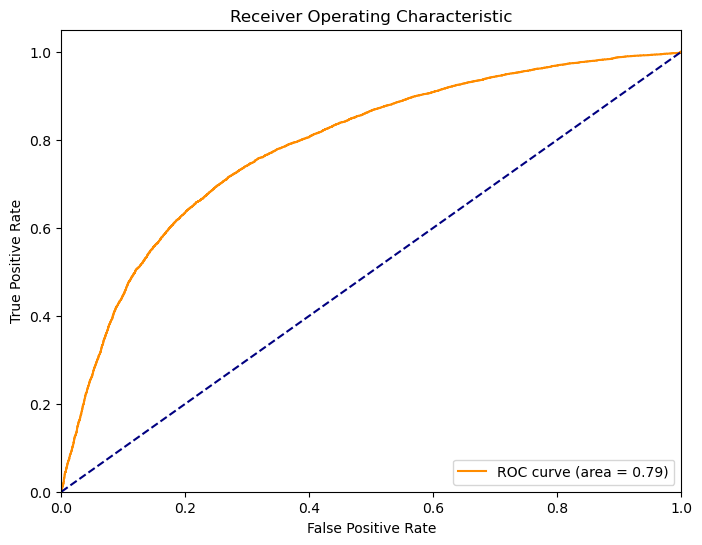

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming y_pred_prob are the probabilities from your logistic regression model
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Get false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# 7. BIC Model

In [47]:
# change Bool to Int
bool_cols = ['gender_2', 'cholesterol_2', 'cholesterol_3', 'gluc_2', 'gluc_3']
X_train_sm[bool_cols] = X_train_sm[bool_cols].astype(int)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())
print("BIC for the model:", result_np.bic)

Optimization terminated successfully.
         Current function value: 0.599559
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                49000
Model:                          Logit   Df Residuals:                    48984
Method:                           MLE   Df Model:                           15
Date:                Wed, 01 May 2024   Pseudo R-squ.:                  0.1350
Time:                        16:01:18   Log-Likelihood:                -29378.
converged:                       True   LL-Null:                       -33964.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.8177      0.396    -17.226      0.000      -7.593      -6.042
id              1.31

In the case, the AIC is 58788.80 and the BIC is 58929.59. Both are close, but the BIC is higher, indicating that the model may be too complex after accounting for sample size. According to your specific needs (such as sample size, model usage, etc.), choose a more suitable indicator for model selection. If the purpose of the model is to explain and understand the relationship between variables, BIC is preferred when the sample size is large; if the purpose of the model is prediction and you are more tolerant of model complexity, you can consider AIC.